# AR MODELS

In [1]:
from ipynb.fs.full.functions import *
# import ipynb.fs.full.my_functions

### Reading the csv file

In [2]:
df.head()

,Datetime,Count
0,2012-08-25,3.166667
1,2012-08-26,3.666667
2,2012-08-27,2.583333
3,2012-08-28,2.416667
4,2012-08-29,2.500000


In [3]:
describe(df)

,count,mean,std,min,25%,50%,75%,max
Count,494.0,60.804656,57.468859,2.416667,15.520833,37.083333,95.0625,257.75


In [4]:
resumetable(df)

Dataset Shape: (494, 2)


,Name,dtypes,Missing,Missing(% of Total values),Uniques,First Value,Second Value
0,Datetime,datetime64[ns],0,0.0,494,2012-08-25 00:00:00,2012-08-26 00:00:00
1,Count,float64,0,0.0,415,3.166667,3.666667


### Splitting the data into train and test

In [5]:
test.head()

,Datetime,Count
444,2013-11-12,135.916667
445,2013-11-13,178.083333
446,2013-11-14,165.916667
447,2013-11-15,120.833333
448,2013-11-16,80.333333


In [6]:
y_hat.head()

,Datetime,Count
444,2013-11-12,135.916667
445,2013-11-13,178.083333
446,2013-11-14,165.916667
447,2013-11-15,120.833333
448,2013-11-16,80.333333


# Autoregressive Models

By plotting ACF and PACF, we can find a suitable model with help of this table given below :-

| Model | ACF Pattern | PACF Pattern |
| --- | --- | --- |
| AR(p) | Exponential decay or damped sine wave pattern or both | Significant spike through first lag |
| MA(q) | Significant spike through first lag | Exponential decay |
| ARMA(1,1) | Exponential decay from lag 1 | Exponential decay from lag 1 |
| ARMA(p,q) | Exponential decay | Exponential decay |

### 1) AR()

In [7]:
def AR(lags, method = "AR"):
    global y_hat
    model = AutoReg(train[time_dependent_variable], lags=lags)
    fit1 = model.fit()
    
    y_hat[method] = fit1.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
    
    
AR(lags= 28)

In [8]:
y_hat.head()

,Datetime,Count,AR
444,2013-11-12,135.916667,192.139884
445,2013-11-13,178.083333,172.975950
446,2013-11-14,165.916667,183.314000
447,2013-11-15,120.833333,149.743249
448,2013-11-16,80.333333,104.689888


In [9]:
# plot(method= 'AR' )

m refers to the number of periods in each season.

• 7 → Daily

• 12 → Monthly

• 52 → Weekly

• 4 → Quarterly

• 1 → Annual (non-seasonal)

In [10]:
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(p_values=range(4), d_values=range(2), q_values=range(4), P_values=range(4), D_values=range(2), Q_values=range(4)):
    best_score, best_cfg = float("inf"), None
#for m in [1, 4,7,12,52]:
    for p in p_values:
        for d in d_values:
            for q in q_values:
                    for P in P_values:
                        for D in D_values:
                            for Q in Q_values:
                                order = (p,d,q,P,D,Q, m)
                                try:
                                    rmse = ARIMA_forecasting(*order)
                                    if rmse < best_score:
                                        best_score, best_cfg = rmse, order
                                    print('ARIMA%s RMSE=%.3f' % (order,rmse))
                                except:
                                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))
    
#evaluate_models()

In [11]:
import pmdarima as pmd

def arimamodel():
    autoarima_model = pmd.auto_arima(train[time_dependent_variable], 
                              start_p=1, 
                              start_q=1,
                               max_p=7, max_q=7, seasonal=False,
                               d=None, trace=True,error_action='ignore',
                              suppress_warnings=True,stepwise=True)
    return autoarima_model


• Pmdarima (for py + arima) is a statistical library designed to fill the void in Python’s time-series analysis capabilities, which is the equivalent of R’s auto.arima

In [13]:
# plot_with_metric(method=  "Auto_ARIMA")

Seasonal ARIMA using Pmdarima Library

In [14]:
def sarimamodel():
    auto_sarima_model = pmd.auto_arima(train[time_dependent_variable], 
                                   start_p=1, start_q=1,
                                    max_p=7, max_q=7, seasonal=True, start_P=1,
                                    start_Q=1, max_P=7, max_D=7, max_Q=7, m=m,
                                    d=None, D=None, trace=True, error_action='ignore', 
                                    suppress_warnings=True,
                                    stepwise=True)

    return auto_sarima_model

In [15]:
# for m in [1,4,7,12,52]:
#     print("="*100)
#     print(f' Fitting SARIMA for Seasonal value m = {str(m)}')
#     auto_arima(method = "Auto_SARIMA", model = sarimamodel())


In [16]:
# m = 7
# auto_arima(method = "Auto_SARIMA", model = sarimamodel())

In [17]:
# plot_with_metric(method=  "Auto_SARIMA")

Adding time based features


In [18]:
df = data_multivariate()

In [19]:
df_new= date_features(df)
df_new.head()

,Datetime,ID,Count,month,year,week_day,quarter,dayofyear,dayofmonth,weekofyear
0,2012-08-25,11.5,3.166667,8,2012,5,3,238,25,34
1,2012-08-26,35.5,3.666667,8,2012,6,3,239,26,34
2,2012-08-27,59.5,2.583333,8,2012,0,3,240,27,35
3,2012-08-28,83.5,2.416667,8,2012,1,3,241,28,35
4,2012-08-29,107.5,2.500000,8,2012,2,3,242,29,35


Reordering the columns such that target column (time_depenedent_variable) is set as the last column in the dataset

In [20]:
df1 = column_reorder(df_new)
df1.head()

,Datetime,ID,month,year,week_day,quarter,dayofyear,dayofmonth,weekofyear,Count
0,2012-08-25,11.5,8,2012,5,3,238,25,34,3.166667
1,2012-08-26,35.5,8,2012,6,3,239,26,34,3.666667
2,2012-08-27,59.5,8,2012,0,3,240,27,35,2.583333
3,2012-08-28,83.5,8,2012,1,3,241,28,35,2.416667
4,2012-08-29,107.5,8,2012,2,3,242,29,35,2.500000


In [26]:
train, test = train_test_split_perc(df1, split = .9)
train_X, train_Y = train.iloc[:, 1], train.iloc[:, -1]
test_X, test_Y = test.iloc[:, 1], test.iloc[:, -1]
train_X.head()

0     11.5
1     35.5
2     59.5
3     83.5
4    107.5
Name: ID, dtype: float64

In [27]:
print (train_X.shape) 
print (test_X.shape) 
print (train_Y.shape) 
print (test_Y.shape) 

(444,)
(50,)
(444,)
(50,)


In [30]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
def SARIMAX_forecasting(p,d,q, P=0,D=0,Q=0,M=7):


    
    model = SARIMAX(train[time_dependent_variable], exog=train_X, order=(p,d,q),  seasonal_order=(P,D,Q,M))
    fit1 = model.fit()
   
    y_hat['SARIMAX'] = fit1.predict(start=len(train), end=len(train)+len(test)-1,exog= test_X, dynamic=False, typ='levels',start_params=[0, 0, 0, 0, 0, 1])
    
    rmse = sqrt(mean_squared_error(test[time_dependent_variable], y_hat.SARIMAX))
    return rmse
SARIMAX_forecasting(1, 1, 1, 1, 0, 3)

25.471250047058145

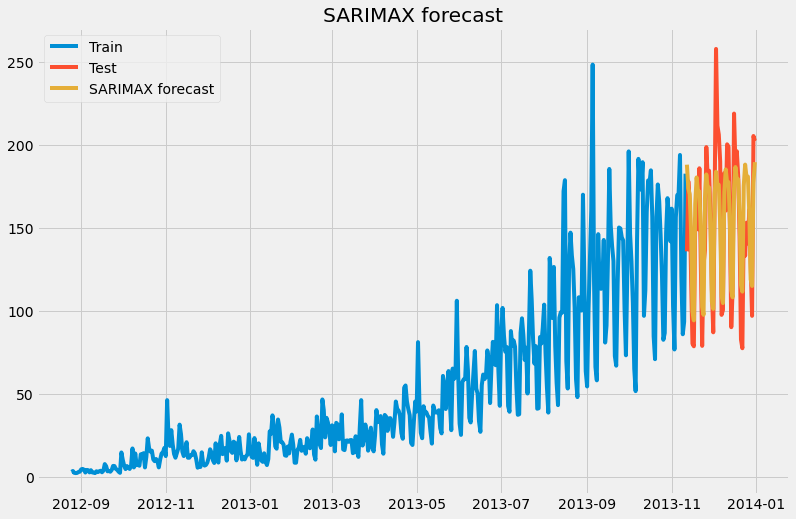

Evaluation metric results:-
MSE is : 648.7845789597596
MAE is : 20.449825666171918
RMSE is : 25.471250047058145
MAPE is : 14.652584394651718
R2 is : 0.656850503734002



In [31]:
plot_with_metric(method= 'SARIMAX' )